In [1]:
from astropy.io import fits
from MyTool_2 import read_list_from_file, save_list_to_file
import numpy as np
import proplot as pplt
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

#plateifu_q = read_list_from_file('Quiescent_galaxies.txt')
plateifu_q = np.load('manga_red_gals.npy')
print(plateifu_q)

['10001-1902' '10001-6101' '10001-6103' ... '9892-3701' '9893-3702'
 '9893-6101']


To read the morphological type of galaxies.

In [6]:
def get_morphology(gal):
    with fits.open('/Users/txl/Desktop/MaNGA/Data/manga_visual_morpho-2.0.1.fits') as hdu:
        data         = hdu[1].data
        plateifu_mor = data['PLATEIFU']
        Type         = data['TYPE'] # Hubble classification
        Ttype        = data['TTYPE'] # T-type
    i = np.where(plateifu_mor == gal)[0]
    T, Tt = Type[i][0], Ttype[i][0]
    return T, Tt

def get_stellar_mass(gal):
    with fits.open('/Users/txl/Desktop/MaNGA/Data/SDSS17Pipe3D_v3_1_1.fits') as hdu:
        data = hdu[1].data
        plateifu_pip = data['PLATEIFU']
        mass = data['log_Mass']
    i = np.where(plateifu_pip == gal)[0]
    M = mass[i][0]
    return M

In [109]:
from MyTool import reju_gal
rej_gal = reju_gal()[0]
#T, Tt, M = [], [], []
for i, gal in enumerate(rej_gal):
    t, tt = get_morphology(gal)
    m = get_stellar_mass(gal)
    print(gal, t, tt, m)
    #T.append(t)
    #Tt.append(tt)
    #M.append(m)
#print(Tt[:10])
#print(M[:10])

Total 94 RJGs. 18 have stellar mass < 10.5.
11751-12705 Sc 5 10.3067172766938
9492-12704 SBb 3 11.2489615090664
11749-12701 SABc 5 10.9908887893055
9884-12703 SABbc 4 10.9443090446514
9879-12704 SABb 3 10.6602005513734
9870-3702 Sab 2 10.734008220301
9484-12705 S 11 11.3798984006278
9195-9101 SBb 3 10.9147938517378
9195-6104 SABbc 4 11.0753045967616
9186-6103 Sab 2 11.4755223181693
9095-12704 Sbc 4 10.8430831913491
9047-12703 SBbc 4 11.3640148930229
9045-12703 SABb 3 11.0964532424126
9039-6102 Sab 2 11.2992208184779
9025-3702 SBb 3 10.6661462073064
9024-12705 SBb 3 11.2943646878418
8995-12705 SBc 5 11.4164423223346
8978-12705 Sc 5 10.9648510743561
8938-12702 SBbc 4 11.2442831175458
8713-12701 SABbc 4 10.9179022361037
8656-6104 SABb 3 10.9723881411516
8615-12701 SBb 3 10.824750979539
8606-12705 SABb 3 10.8992710499617
8588-6101 Sab 2 10.9684114548209
8567-9102 Sb 3 10.9241983542554
8448-9101 Sbc 4 11.013948407736
8447-3704 Sab 2 10.803794505695
8444-12703 SBc 5 11.0176480961963
8438-910

29


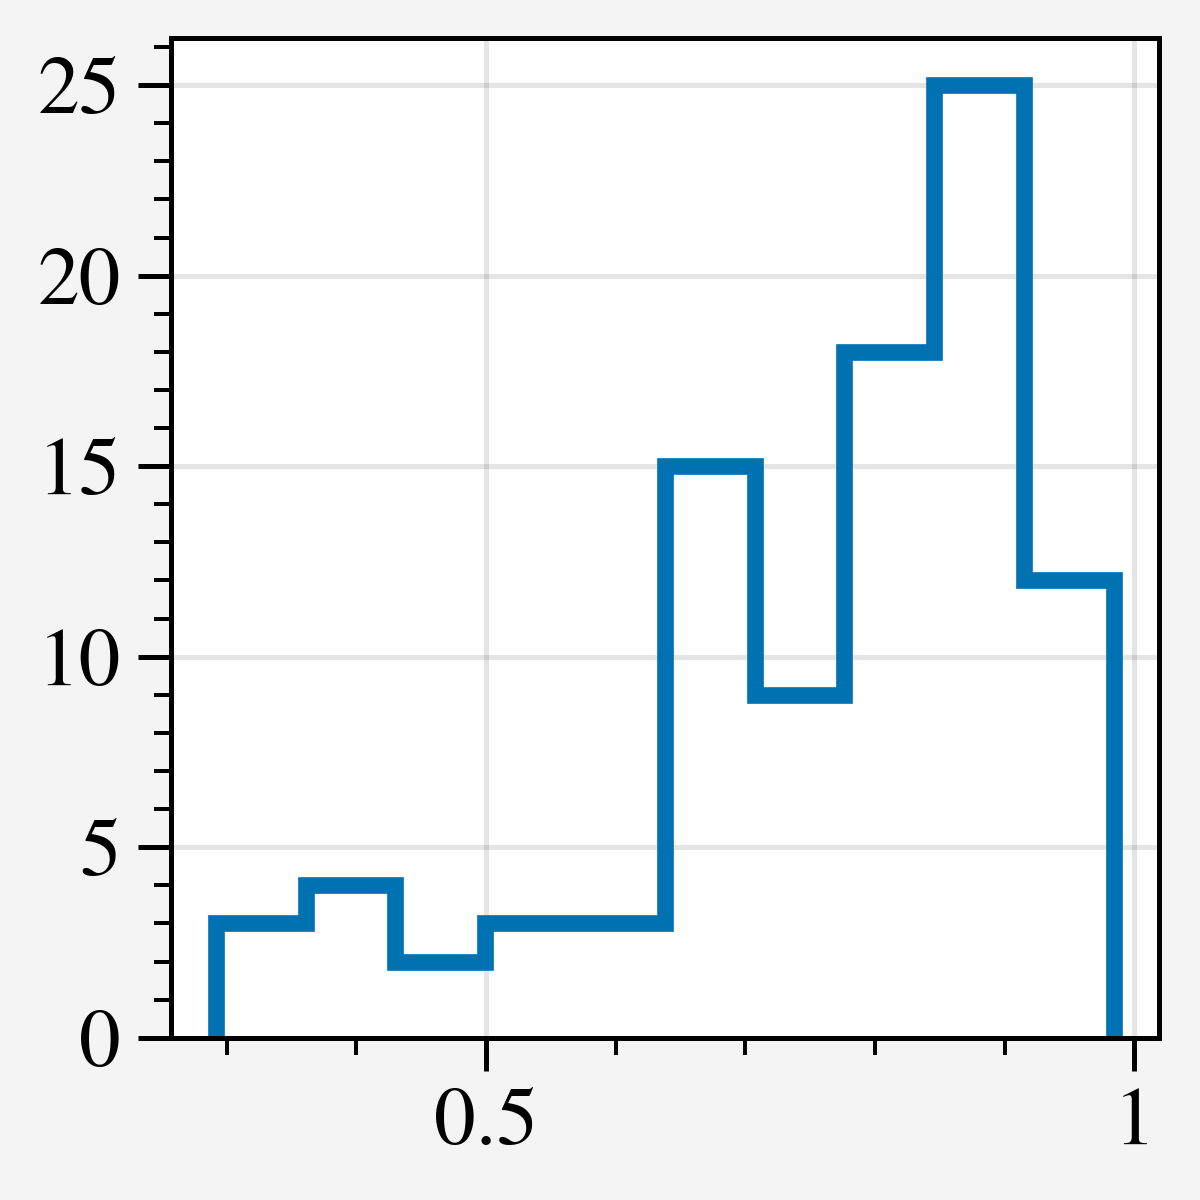

In [199]:
from MyTool import Drpall
ba = []
for gal in rej_gal:
    drp = Drpall(gal)
    b = drp.ba()
    ba.append(b)
count = (np.array(ba) < 0.7).sum()
print(count)
fig, ax = pplt.subplots(figsize=(2,2))
ax.hist(ba, bins=10, histtype='step', lw=2, color='C0')
pplt.show()

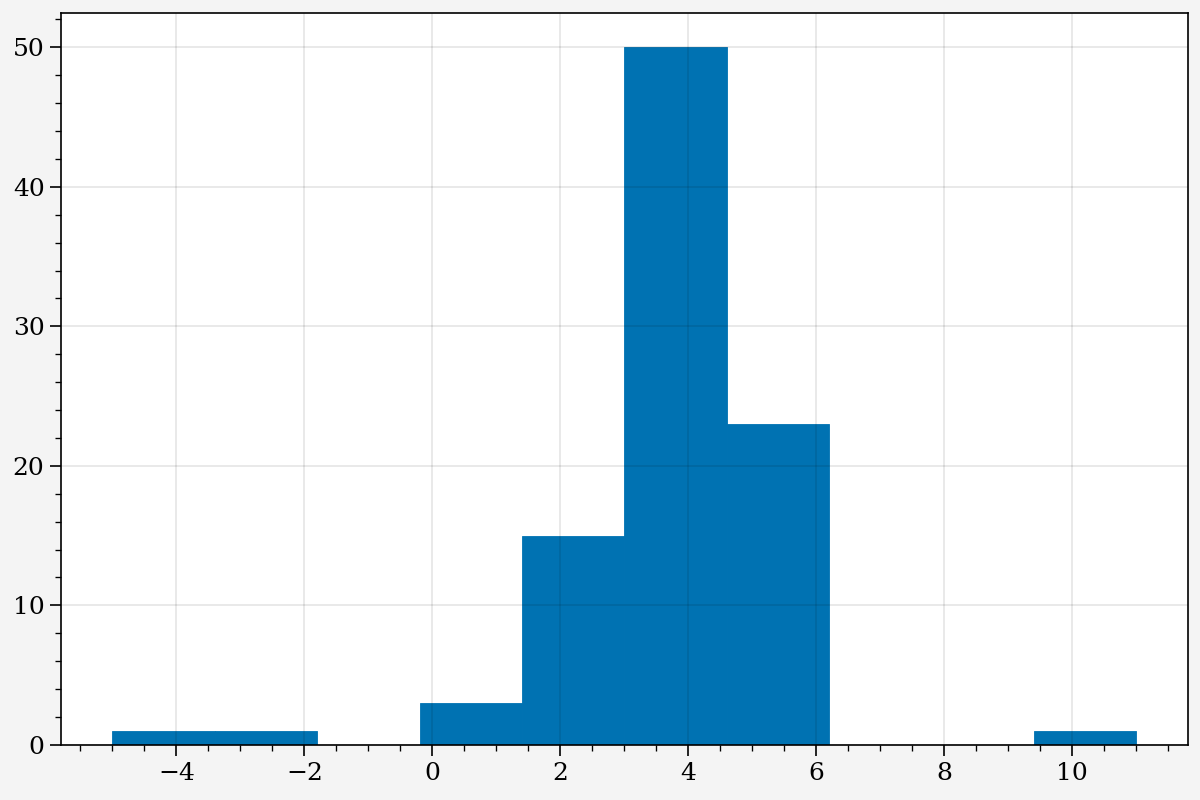

{'Sab', 'SBb', 'E', 'Sc', 'SBbc', 'SBa', 'Sb', 'Sa', 'S0a', 'SABb', 'SBc', 'SABab', 'SAB0', 'SABbc', 'SABc', 'SBab', 'S', 'Sbc', 'Scd'}
{0, 1, 2, 3, 4, 5, 6, 11, -5, -2}


In [83]:
fig, ax = pplt.subplots(figsize=(6, 4))
ax.hist(Tt)
pplt.show()
print(set(T))
print(set(Tt))

In [110]:
import pandas as pd
from itertools import zip_longest
print('Max of Ttype:', max(Tt), 'Min of Ttype:', min(Tt), 'Median of Ttype:', np.median(Tt), 'Mean of Ttype:', np.mean(Tt))
#data = pd.DataFrame()
data_dic = {}
label_dic = {-5: 'E', -2: 'S0', 0: 'S0/a', 1: 'Sa', 2: 'Sab', 3: 'Sd', 4: 'Sbc', 5: 'Sc', 6: 'Scd', 11: 'Irr'}
list_Tt = [-5, -2, 0, 1, 2, 3, 4, 5, 6, 11]
for i in list_Tt:
    idx = np.where(np.array(Tt) == i)[0]
    print(idx)
    #print(np.array(Tt)[idx], np.array(M)[idx])
    a = {"%i" %i: list(np.array(M)[idx])}
    data_dic.update(a)
    #data = data.append(a, ignore_index=True)
print(data_dic)
series_list = [pd.Series(values, name=key) for key, values in data_dic.items()]
data = pd.concat(series_list, axis=1)

Max of Ttype: 11 Min of Ttype: -5 Median of Ttype: 4.0 Mean of Ttype: 3.5
[49]
[60]
[86]
[57 72]
[ 5  9 13 23 26 30 31 52 65 68 75 83 89 91 93]
[ 1  4  7 12 14 15 20 21 22 24 33 38 40 42 45 46 50 62 63 67 76 85 90]
[ 3  8 10 11 18 19 25 35 36 37 41 51 53 55 56 58 59 61 71 74 78 79 81 82
 84 88 92]
[ 0  2 16 17 27 28 29 32 34 39 43 44 47 48 54 64 66 69 70 73 77 87]
[80]
[6]
{'-5': [9.74341106018115], '-2': [11.0787806280823], '0': [10.8027142112833], '1': [10.9497603161761, 9.46297176281744], '2': [10.734008220301, 11.4755223181693, 11.2992208184779, 10.9684114548209, 10.803794505695, 11.0055590119475, 11.0962594246391, 11.0797146278021, 10.9915352993544, 10.7992990031686, 11.4847975198819, 10.7565564220176, 11.1174887130174, 11.322054530609, 11.0706294056098], '3': [11.2489615090664, 10.6602005513734, 10.9147938517378, 11.0964532424126, 10.6661462073064, 11.2943646878418, 10.9723881411516, 10.824750979539, 10.8992710499617, 10.9241983542554, 11.0996783199007, 11.0245659887119, 11.23518

In [111]:
data

,-5,-2,0,1,2,3,4,5,6,11
0,9.743411,11.078781,10.802714,10.949760,10.734008,11.248962,10.944309,10.306717,9.733822,11.379898
1,NaN,NaN,NaN,9.462972,11.475522,10.660201,11.075305,10.990889,NaN,NaN
2,NaN,NaN,NaN,NaN,11.299221,10.914794,10.843083,11.416442,NaN,NaN
3,NaN,NaN,NaN,NaN,10.968411,11.096453,11.364015,10.964851,NaN,NaN
4,NaN,NaN,NaN,NaN,10.803795,10.666146,11.244283,11.017648,NaN,NaN
5,NaN,NaN,NaN,NaN,11.005559,11.294365,10.917902,10.290553,NaN,NaN
6,NaN,NaN,NaN,NaN,11.096259,10.972388,11.013948,10.743595,NaN,NaN
7,NaN,NaN,NaN,NaN,11.079715,10.824751,9.803689,10.750114,NaN,NaN
8,NaN,NaN,NaN,NaN,10.991535,10.899271,11.397143,10.133812,NaN,NaN
9,NaN,NaN,NaN,NaN,10.799299,10.924198,11.121807,10.825915,NaN,NaN


In [195]:
pplt.rc['label.size'] = 12
pplt.rc['tick.labelsize'] = 10
pplt.rc['font.serif'] = 'TeX Gyre Termes'
pplt.rc['rightlabel.color'] = 'blue5'
pplt.rc['rightlabel.weight'] = 'normal'
pplt.rc['label.weight'] = 'bold'
pplt.rc['figure.dpi'] = 300
pplt.rc.save()

/var/folders/8q/svw_20t17nz2mj7zww86s_xh0000gn/T/ipykernel_41712/2851077638.py:8: ProplotWarning: Existing file './proplotrc' was moved to './proplotrc.bak'.
  pplt.rc.save()


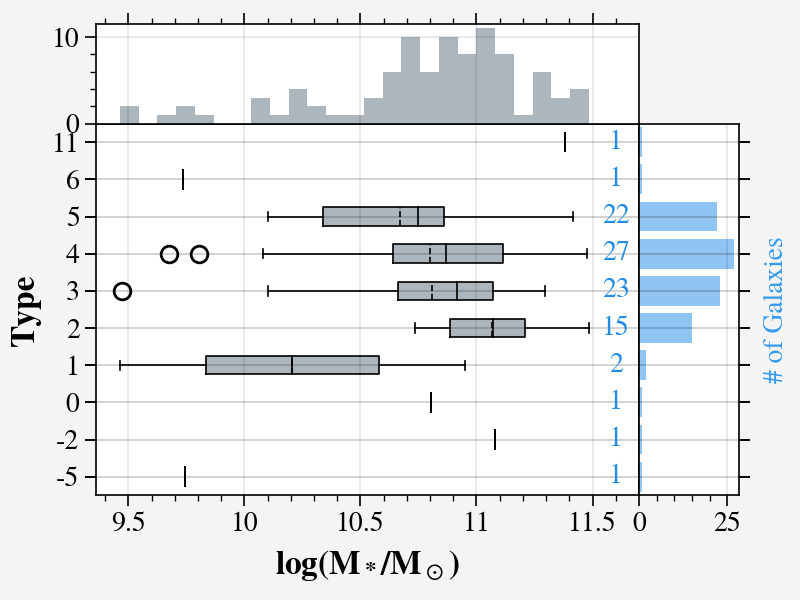

In [193]:
fig, ax = pplt.subplots(ncols=1, nrows=1, figsize=(4, 3), sharex=True, sharey=True, tight=True)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 1, 1, 2, 15, 23, 27, 22, 1, 1]
obj2 = ax.boxh(data, fillcolor='gray5', means=True)
for i, ele in enumerate(x):
    ax.text(11.6, ele, y[i], color='blue6', ha='center', va='center', fontsize=10)
ax.format(xlabel='log(M$_*$/M$_\odot$)', ylabel='Type', rightlabels=['# of Galaxies'], xmax=11.7)
px, py = ax.panel('t', space=0), ax.panel('r', space=0)
#px.set_xticks([])
px.hist(M, bins=25, color='gray5', lw=0)
py.bar(x, y, orientation='horizontal', color='blue6', alpha=0.5, lw=0)
fig.savefig('/Users/txl/Desktop/MaNGA/Paper_figures/morphology_type.pdf', bbox_inches='tight', facecolor='none', transparent=True)
pplt.show()

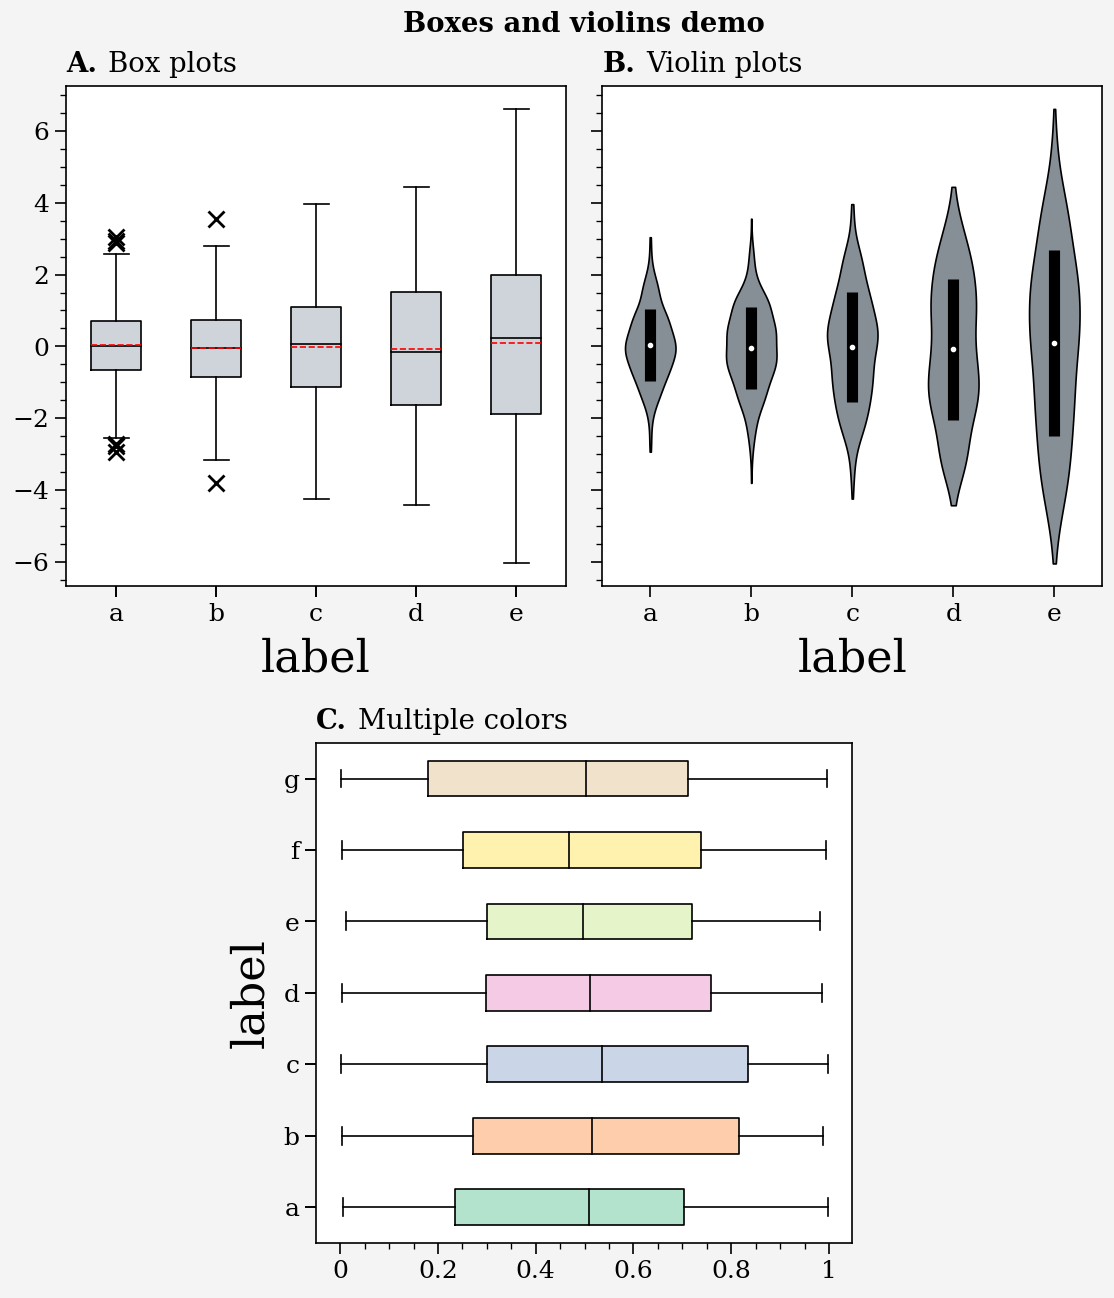

In [21]:
import pandas as pd
# Sample data
N = 500
state = np.random.RandomState(51423)
data1 = state.normal(size=(N, 5)) + 2 * (state.rand(N, 5) - 0.5) * np.arange(5)
data1 = pd.DataFrame(data1, columns=pd.Index(list('abcde'), name='label'))
data2 = state.rand(100, 7)
data2 = pd.DataFrame(data2, columns=pd.Index(list('abcdefg'), name='label'))

# Figure
fig, axs = pplt.subplots([[1, 1, 2, 2], [0, 3, 3, 0]], span=False)
axs.format(
    abc='A.', titleloc='l', grid=False,
    suptitle='Boxes and violins demo'
)

# Box plots
ax = axs[0]
obj1 = ax.box(data1, means=True, marker='x', meancolor='r', fillcolor='gray4')
ax.format(title='Box plots')

# Violin plots
ax = axs[1]
obj2 = ax.violin(data1, fillcolor='gray6', means=True, points=100)
ax.format(title='Violin plots')

# Boxes with different colors
ax = axs[2]
ax.boxh(data2, cycle='pastel2')
ax.format(title='Multiple colors', ymargin=0.15)

In [ ]:
import pandas as pd
data1 = pd.DataFrame(M, columns=pd.Index(list()))

fig, ax = pplt.subplots()
ax.violin(Tt, M)
ax.set_ylabel('T-type')
ax.set_xlabel('log Stellar Mass')
pplt.show()

In [2]:
# Read morphological data




with fits.open("/Users/txl/Desktop/MaNGA/Data/drpall-v3_1_1.fits") as hdu:
    data = hdu[1].data
    plateifu = data['PLATEIFU']
    ba = data['nsa_elpetro_ba']
    M = np.log10(data['nsa_elpetro_mass'] * 10/7)

# Here is to select control sample in "spiral" and "face-on" galaxies
cross_matched_plateifu = [item for item in plateifu_q if item in plateifu_mor]
gal_final = []
for gal in cross_matched_plateifu:
    idx = np.where(plateifu == gal)[0]
    if (ba[idx] >= 0.7):
        gal_final.append(gal)
    else:
        print(gal)
print(len(plateifu_q))
print(len(gal_final))
print(len(cross_matched_plateifu))

10515-12703
10520-12702
11012-12704
11945-12703
12067-9102
12078-6102
7977-12702
8082-12705
8153-12703
8317-6103
8606-12703
8711-3702
9035-6103
9094-3702
9486-9101
1036
1006
1021


In [27]:
print(len(cross_matched_plateifu))
print((gal_final))

1021
['10001-6101', '10001-6103', '10214-12702', '10214-3704', '10214-6102', '10214-9101', '10215-3704', '10216-9101', '10217-6101', '10217-6104', '10218-3702', '10219-3704', '10220-3704', '10220-6102', '10221-3702', '10222-3702', '10223-6102', '10223-6103', '10224-3701', '10226-12702', '10493-6103', '10494-6104', '10495-3701', '10495-3704', '10497-12704', '10497-9101', '10498-3703', '10498-9102', '10500-12705', '10500-3704', '10502-6101', '10502-6102', '10502-9102', '10508-6102', '10508-9101', '10511-6102', '10511-6103', '10512-3701', '10513-12701', '10513-3704', '10513-6102', '10514-3702', '10515-3702', '10515-6101', '10516-6101', '10519-12703', '10519-3702', '10519-3703', '10519-3704', '10519-6103', '10837-1901', '10837-6101', '10837-6102', '10837-6103', '10837-6104', '10838-12702', '10838-3701', '10839-12703', '10839-3701', '10839-3702', '10839-3703', '10840-3702', '10840-6101', '10840-6102', '10840-6103', '10841-9101', '10841-9102', '10842-6101', '10843-6101', '10844-12704', '1084

In [130]:
def save_list_to_file(lst, filename):
    with open(filename, 'w') as f:
        for item in lst:
            f.write(item + '\n')

save_list_to_file(gal_final, 'plateifu_spiral_blue.txt')

In [ ]:
from MyTool_2 import reju_gal
rej_spa = reju_gal()[1]
indx = []
for gal in ['9492-12704']:
    i = np.where(plateifu == gal)[0][0]
    print('%s, %s' % (gal, Type[i]))
#mor_spa = Type[indx]
#print(mor_spa)

In [14]:
print(set(Type))

{'SABm', 'SAB', 'SBm', 'SABb', 'Sab', 'SABc', 'SAB-merger', 'SABdm', 'E(dSph)', 'SBab', 'SBbc', 'Sm', 'Sc', 'S0', 'SAB0a', 'SBcd', 'Sbc', 'S0a', 'interacting', 'Sdm', 'SBc', 'SB0a', 'IrrB', 'BCD', 'SBb', 'Irr', 'SBd', 'SAB0', 'dSph', 'Sd', 'dIrr', 'dwarf', 'Sb', 'SABbc', 'SABcd', 'Scd', 'E', 'S0(dwarf)', 'SBdm', 'SBa', 'SABd', 'SABa', 'Sa', 'SB0', 'E+E', 'S', 'SABab', 'IrrAB', 'Edc', 'S-merger'}


In [124]:
target = ['SAB', 'SB', 'Sa', 'Sb']
#result = [(idx, ele) for idx, ele in enumerate(Type) if 'SAB' or 'SBb' or 'Sab' in ele]
result = [(idx, ele) for idx, ele in enumerate(Type) for tar in target if tar in ele]
plateifu_m = []
for i, gal in result:
    plateifu_m.append(plateifu_mor[i])
    print(f'plateifu: {plateifu_mor[i]}, Type: {gal}')

plateifu: 10001-12701, Type: Sbc
plateifu: 10001-12702, Type: SABbc
plateifu: 10001-12703, Type: SABbc
plateifu: 10001-12705, Type: Sbc
plateifu: 10001-1901, Type: Sbc
plateifu: 10001-1902, Type: SB0
plateifu: 10001-3701, Type: SAB0
plateifu: 10001-3703, Type: SABb
plateifu: 10001-6102, Type: SBab
plateifu: 10001-6103, Type: SB0a
plateifu: 10001-6104, Type: SABb
plateifu: 10001-9101, Type: SBd
plateifu: 10213-12702, Type: SABcd
plateifu: 10213-12705, Type: SBbc
plateifu: 10213-6101, Type: SB0
plateifu: 10213-6102, Type: Sa
plateifu: 10213-6103, Type: Sab
plateifu: 10213-9101, Type: Sbc
plateifu: 10213-9102, Type: Sbc
plateifu: 10214-12701, Type: Sbc
plateifu: 10214-12703, Type: SBab
plateifu: 10214-1901, Type: Sb
plateifu: 10214-6101, Type: SABb
plateifu: 10214-6103, Type: SABcd
plateifu: 10214-6104, Type: Sb
plateifu: 10214-9102, Type: SABab
plateifu: 10215-12701, Type: Sb
plateifu: 10215-12703, Type: SABd
plateifu: 10215-12705, Type: Sbc
plateifu: 10215-1902, Type: Sa
plateifu: 10215

In [1]:
from MyTool_2 import read_list_from_file
plateifu_q = read_list_from_file('Quiescent_galaxies.txt')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [6]:
for gal in plateifu_q:
    i = np.where(plateifu_mor == gal)[0][0]
    print('%s, %s' % (gal, Type[i]))

10001-1902, SB0
10001-3701, SAB0
10001-3704, E
10001-6101, Edc
10001-6103, SB0a
10001-6104, SABb
10001-9102, S0
10213-12701, Edc
10213-12704, Edc
10213-1901, S0a
10213-3704, E
10213-6101, SB0
10213-6102, Sa
10213-6103, Sab
10213-6104, S0
10214-12702, E
10214-12703, SBab
10214-12704, S0
10214-12705, S0
10214-1901, Sb
10214-3703, E
10214-3704, E
10214-6102, E
10214-9101, Edc
10214-9102, SABab
10216-1901, SABa
10216-1902, SAB0
10216-3701, S0a
10216-3702, SBa
10216-3703, S0
10216-9101, Edc
10216-9102, SBab
10217-1901, SBab
10217-1902, SAB0a
10217-6101, E
10217-6102, Sa
10217-6104, Edc
10218-3702, Sa
10218-6101, Edc
10219-1901, S0
10219-1902, Edc
10219-3701, Sa
10219-3702, S0
10219-3703, S0a
10219-3704, E
10219-6101, S0(dwarf)
10219-6102, S0
10220-1901, Sab
10220-1902, S0
10220-3703, Sa
10220-3704, E
10220-6101, Edc
10220-6102, Sa
10221-3701, SABa
10221-3702, E
10221-3703, E
10222-1901, E
10222-3702, E
10222-3703, Edc
10222-6104, SAB0
10223-12701, E
10223-1901, Edc
10223-3704, SABa
10223-61

IndexError: index 0 is out of bounds for axis 0 with size 0

In [26]:
gal = data['plateifu']
bar = data['BULGE-SIZE_LARGE_FRACTION']
print(bar)

[0.01309201 0.1910972  0.03655261 ... 0.03533561 0.06284806 0.10015495]


In [29]:
ind = np.where(bar == np.min(bar))
print(gal[ind], np.min(bar))

['12683-12703'] 0.008531289915312075


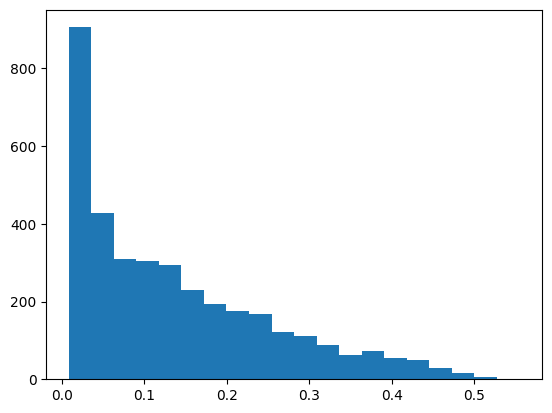

In [28]:
plt.hist(bar, bins=20)
plt.show()

In [25]:
len(bar[0])

198

# Select Quiencent Galaxies
By using the sSFR < -11.5 Msun/year (NUV-r > 5). I want to select the LTGs and face-on galaxies.

In [5]:
# Pipe3D: Obtain global SFR and stellar mass
with fits.open('/Users/txl/Desktop/MaNGA/Data/SDSS17Pipe3D_v3_1_1.fits') as hdu:
    plateifu_pip = hdu[1].data['plateifu']
    sfr   = hdu[1].data['log_SFR_Ha']
    e_sfr = hdu[1].data['e_log_SFR_Ha']
    M     = hdu[1].data['log_Mass']
    e_M   = hdu[1].data['e_log_Mass']

# Visual morphological classification
with fits.open('/Users/txl/Desktop/MaNGA/Data/manga_visual_morpho-2.0.1.fits') as hdu:
    data         = hdu[1].data
    plateifu_mor = data['PLATEIFU']
    Type         = data['TYPE']  # Hubble classification
    Ttype        = data['Ttype'] # T-type classification

with fits.open("/Users/txl/Desktop/MaNGA/Data/drpall-v3_1_1.fits") as hdu:
    data = hdu[1].data
    plateifu_drp = data['PLATEIFU']
    ba = data['nsa_elpetro_ba']
    

with fits.open('/Users/txl/Desktop/MaNGA/Data/drpall-v3_1_1.fits') as drpall:
    # 1: MaNGA / 2: MaStar
    data = drpall[1].data
    mag  = data['nsa_elpetro_absmag'] # the color magnitude
    mag_err = data['NSA_ELPETRO_AMIVAR']
    ID   = data['plateifu'] # the plateifu
    mass = np.log10(data['NSA_ELPETRO_MASS']*10/7) # log(Msun), h = 0.7
    tar1 = data['MNGTARG1']
    tar3 = data['MNGTARG3']
    

# About morphology
mask_mor = ((Ttype >= 1) & (Ttype <= 7))
plateifu_mor = plateifu_mor[mask_mor]
# About DRPALL
mask_drp = (ba > 0.7)
plateifu_drp = plateifu_drp[mask_drp]

sSFR = sfr - M
ssfr, Gal = [], []
for i, gal in enumerate(plateifu_mor):
    idx = np.where(plateifu_pip == gal)[0]
    if len(idx) == 0:
        continue
    if sSFR[idx] < -11.6:
        ssfr.extend(sSFR[idx])
        Gal.extend([gal])

print(len(ssfr))

873


In [15]:
print(np.random.choice(Gal, 10))

['8249-9102' '9032-6102' '11749-6101' '9865-3704' '12066-3702' '8952-1901'
 '8945-6104' '9893-1902' '9879-12702' '8932-12702']


In [6]:
print(len(plateifu_mor))
print(len(plateifu_drp))

6136
5763


In [19]:
save_list_to_file(Gal, 'Quiescent_galaxies_LTG.txt')

In [7]:
GG = []
for i, gal in enumerate(plateifu_mor):
    idx = np.where(plateifu_drp == gal)[0]
    GG.append(gal)
    if len(idx) == 0:
        continue

In [20]:
plateifu_all = np.array(list(set(plateifu_mor) & set(plateifu_drp)))
print(plateifu_all)
# This galaxies are face-on galaxies and spiral galaxies

['12652-12702' '10496-12704' '7978-9102' ... '7964-3704' '8249-12703'
 '8318-6104']


In [14]:
print(len(set(plateifu_mor)))

6136


In [21]:
len(plateifu_all)

2525

In [22]:
np.save('plateifu_all.npy', plateifu_all)